In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"E:\2025_Intellipat\Decison Tree\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
col = list(df.columns)

In [15]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [16]:
df.shape

(302, 14)

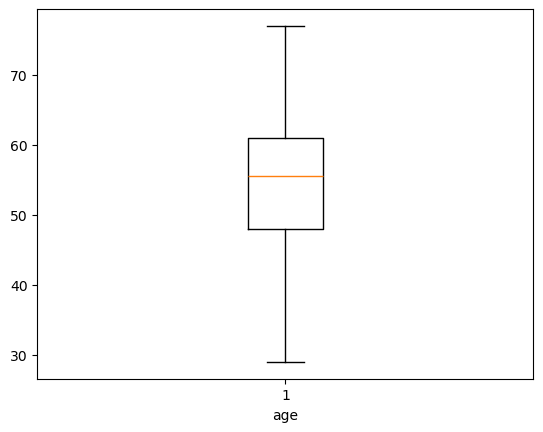

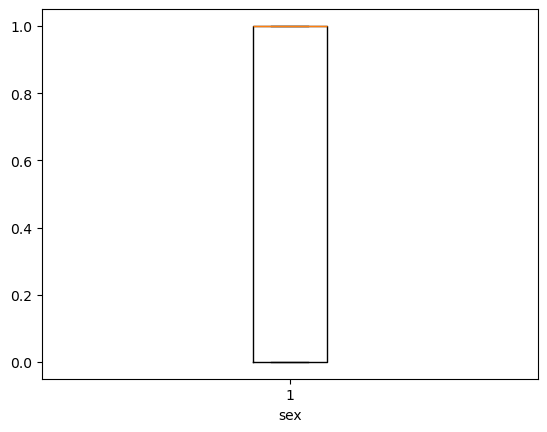

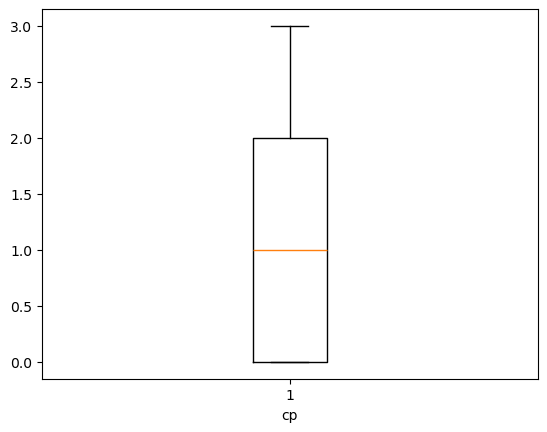

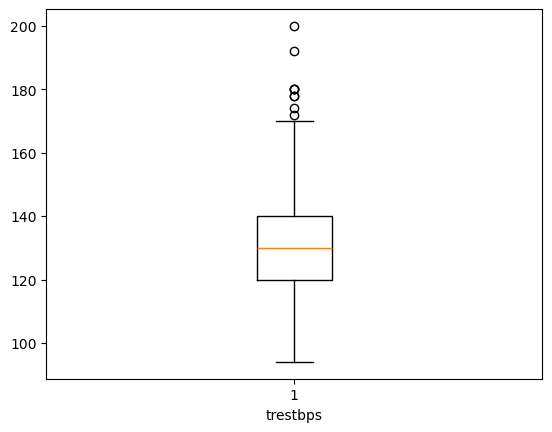

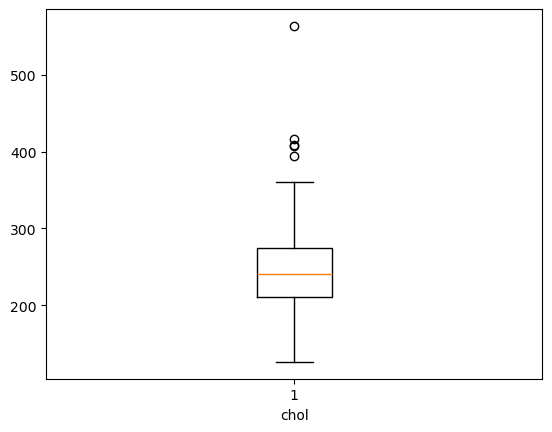

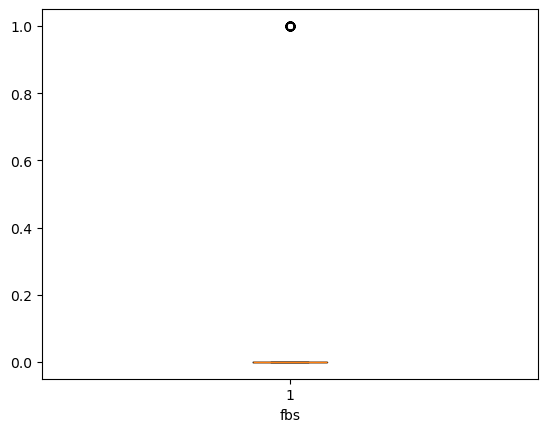

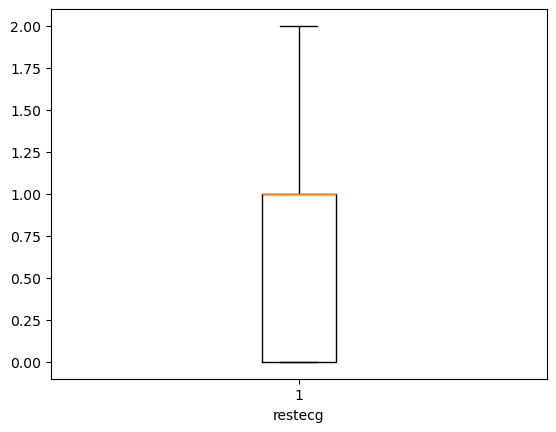

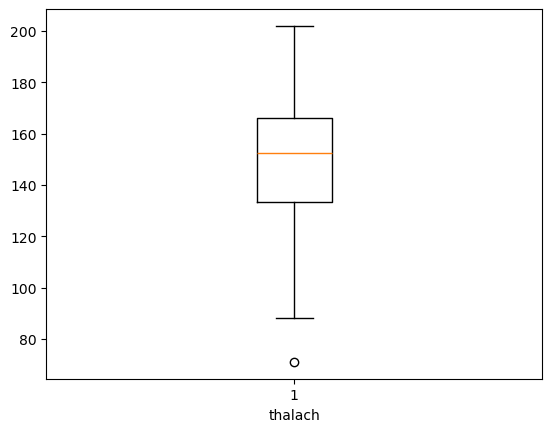

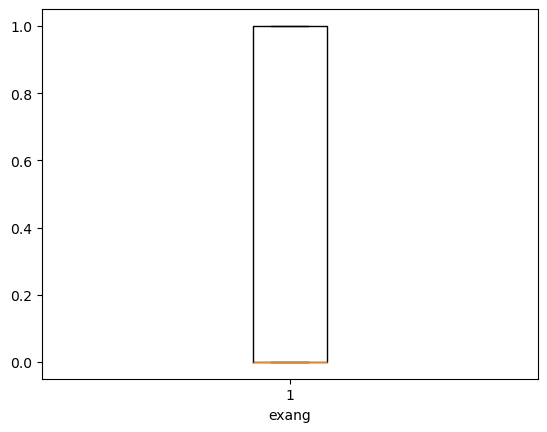

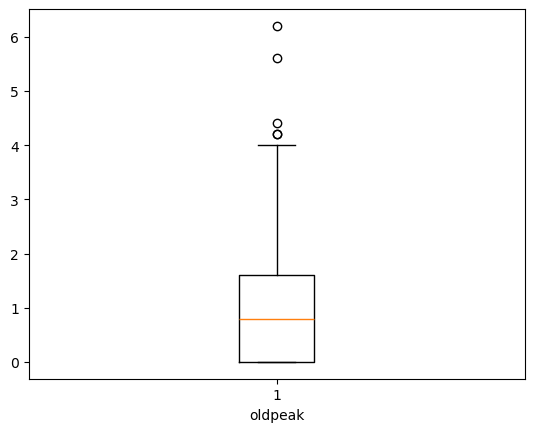

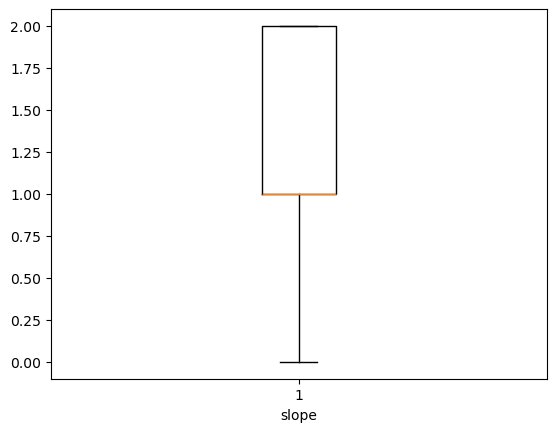

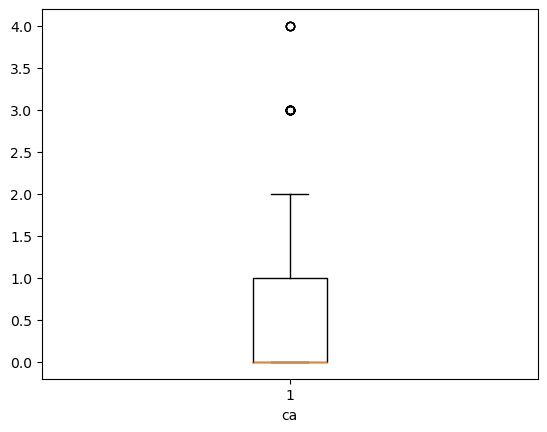

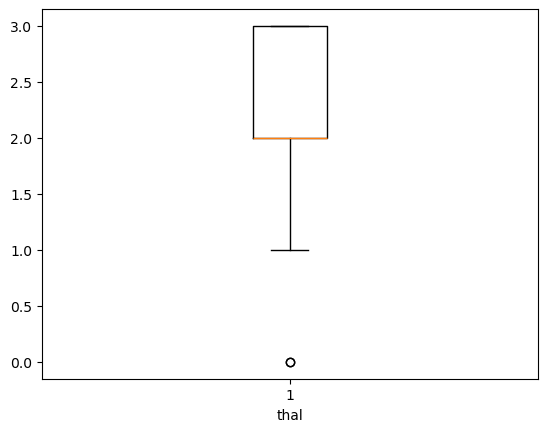

In [17]:
#we are not considering target column since it is an dependent variable i.e., outliers from independent variables are already removing
for i in col:     
    if i!="target":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [18]:
#In this case we are not going to remove the Outliers bcz of the below reasons
#1. The Size of the Data is Very small (i.e., 380 in this case)
#2. The data we are working is Medical Data, so outliers needs to be considered that plays a major role 

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

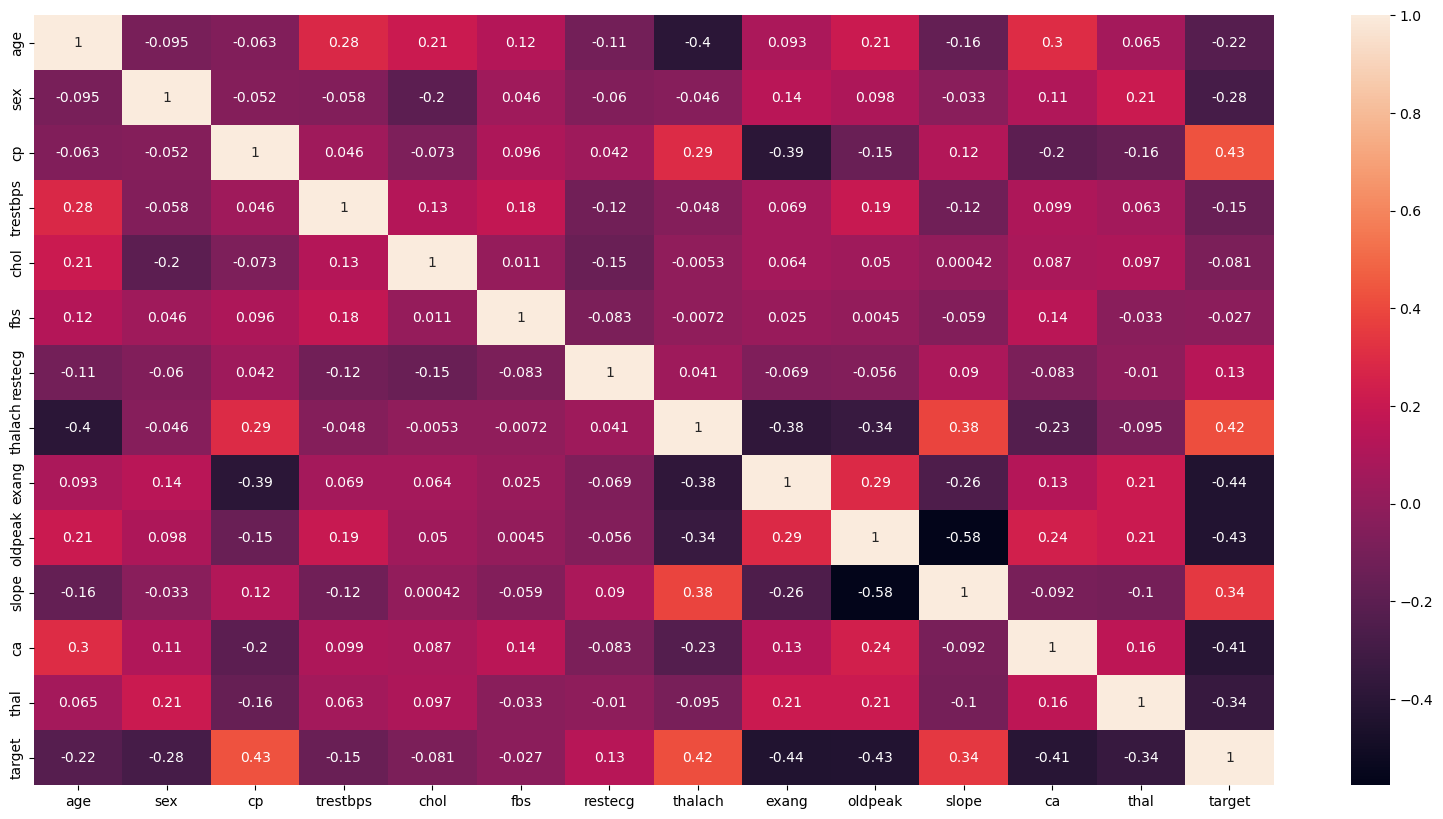

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [21]:
x = df.drop("target", axis=1)
y = df['target']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train.shape

(241, 13)

In [50]:
x_test.shape

(61, 13)

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred = model.predict(x_test)

In [54]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [55]:
accuracy_score(y_test, y_pred)

0.8032786885245902

In [56]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 8, 24]])

In [62]:
depth = list(range(1,15))

In [63]:
depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [64]:
for i in depth:
    model = DecisionTreeClassifier(max_depth = i, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Max_Depth =", i , "Accuracy Score :", acc*100)

Max_Depth = 1 Accuracy Score : 72.1311475409836
Max_Depth = 2 Accuracy Score : 73.77049180327869
Max_Depth = 3 Accuracy Score : 78.68852459016394
Max_Depth = 4 Accuracy Score : 80.32786885245902
Max_Depth = 5 Accuracy Score : 80.32786885245902
Max_Depth = 6 Accuracy Score : 77.04918032786885
Max_Depth = 7 Accuracy Score : 77.04918032786885
Max_Depth = 8 Accuracy Score : 78.68852459016394
Max_Depth = 9 Accuracy Score : 77.04918032786885
Max_Depth = 10 Accuracy Score : 78.68852459016394
Max_Depth = 11 Accuracy Score : 77.04918032786885
Max_Depth = 12 Accuracy Score : 77.04918032786885
Max_Depth = 13 Accuracy Score : 77.04918032786885
Max_Depth = 14 Accuracy Score : 77.04918032786885


In [65]:
#In this case accuracy score is high when Max_depth is 4 and after that as we is its reducing and almost constant

# Hyper Parameter tuning

#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model.

#max depth -

max_depth is a parameter in decision tree algorithms that specifies the maximum depth or maximum number of levels allowed in the decision tree.

#min_samples_split - default=2

->min_samples_split is a parameter in decision tree algorithms
that determines the minimum number of samples required to split an internal node.
->It specifies the minimum number of samples that should be present in a node for the algorithm to consider splitting it further.

#min_samples_leaf - default = 1

-> min_samples_leaf is another parameter in decision tree algorithms that determines the minimum number of samples required to be present in a leaf node.
-> It specifies the minimum number of samples that should be in a leaf for the algorithm to consider it as a valid leaf node.



#"gini", "entropy"

gini--it measures how often a randomly chosen element from the dataset would be incorrectly classified

entropy is another measure of impurity or uncertainty that is used to evaluate how well a feature splits the data.

In [66]:
#Hyper Parameter Tuning

In [73]:
#we defind parameter grid for Tuning
param_grid = {
    #'n_estimators' : [50, 100, 200],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [3,4,5, None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf': [1,2,5],
}

In [74]:
#Using GridsearchCv for Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=14, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [77]:
print("Best Accuracy:" , grid_search.best_score_)

Best Accuracy: 0.7966049382716048


In [85]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy*100)

Test Accuracy: 80.32786885245902


In [86]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [87]:
y_pred = best_model.predict(x_test)

In [88]:
accuracy_score(y_test, y_pred)*100

80.32786885245902